In [ ]:
import reset
from pathlib import Path
import numpy as np
import tifffile
import math
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
animal_loc = reset.animal_loc
animal_id = reset.animal_id
hemi = reset.hemi
divisor = reset.divisor
down_x = reset.down_x
down_y = reset.down_y
loc_max = reset.loc_max
grid = reset.grid
frame_len = reset.frame_len

In [ ]:
rat_id = "rbak002"
hemisphere = "left"
location = "17"
grid = 4

#-------------------------------------------------------------------------------

image_loc = "drive/MyDrive/Lab/" + rat_id + "/concatenated/" + hemisphere + "/"
save_loc = "drive/MyDrive/Lab/" + rat_id + "/trimmed/" + hemisphere + "/"

if hemisphere == "left":
  image_hemisphere = "l"
else:
  image_hemisphere = "r"

image_name = rat_id + "_" + image_hemisphere + "_g_" + location + ".tif"
image_path = os.path.join(image_loc, image_name)
save_path = os.path.join(save_loc, image_name)
image_array = tifffile.imread(image_path).astype("f")

delf_list = []
f1 = 9
last_frame = (f1-1) + 62

for n in range(f1-1):
  delf_list.append(n)

if (len(image_array) - (f1-1)) > 62:
  for n in range(len(image_array) - last_frame):
    delf_list.append(n + 62)
  new_image_array = np.delete(image_array, delf_list, 0)
  tifffile.imwrite(save_path, new_image_array)

elif (len(image_array) - (f1-1)) == 62:
  new_image_array = np.delete(image_array, delf_list, 0)
  tifffile.imwrite(save_path, new_image_array)

else:
  print("less than 62 frames")

#-------------------------------------------------------------------------------
print(len(image_array))
print(new_image_array.shape)

70
(62, 4096, 2160)


In [ ]:
rat_id = "rbak002"
hemisphere = "right"
location = "9"
grid = 16

#-------------------------------------------------------------------------------

image_loc = "drive/MyDrive/Lab/" + rat_id + "/concatenated/" + hemisphere + "/"
save_loc = "drive/MyDrive/Lab/" + rat_id + "/trimmed/" + hemisphere + "/"

if hemisphere == "left":
  image_hemisphere = "l"
else:
  image_hemisphere = "r"

image_name = rat_id + "_" + image_hemisphere + "_g_" + location + ".tif"
image_path = os.path.join(image_loc, image_name)
save_path = os.path.join(save_loc, image_name)
image_array = tifffile.imread(image_path).astype("f")

xsize = int(2160/grid)
ysize = int(4096/grid)

old_set = []
new_set = []

start_trim = False

while set(old_set) == set(new_set):

  for i in range(len(image_array)):

    diff_list = []
    diff_md_list = []
    new_set = []

    f1 = i+1
    f2 = i+2

    if i+1 >= len(image_array):
      break

    else:
      tdframe1 = image_array[i]
      tdframe2 = image_array[i+1]

      for y in range(grid):
        for x in range(grid):
          rect1 = tdframe1[y*ysize:(y+1)*ysize,x*xsize:(x+1)*xsize]
          rect2 = tdframe2[y*ysize:(y+1)*ysize,x*xsize:(x+1)*xsize]
          range1 = np.reshape(rect1, xsize*ysize)
          range2 = np.reshape(rect2, xsize*ysize)

          diff_list = abs(range1 - range2)

          diff_md = np.median(diff_list)
          diff_md_list.append(diff_md)

      new_set = set(diff_md_list)

      if i == 0:
        pass
      elif set(old_set) != set(new_set):
        print(f1,"-",(f1+61))
        start_trim = True
        break
      else:
        pass

      old_set = []
      old_set = set(diff_md_list)

#-------------------------------------------------------------------------------

delf_list = []
last_frame = (f1-1) + 62

if start_trim == True:

  for n in range(f1-1):
    delf_list.append(n)

  if (len(image_array) - (f1-1)) > 62:
    for n in range(len(image_array) - last_frame):
      delf_list.append(n + 62)
    new_image_array = np.delete(image_array, delf_list, 0)
    tifffile.imwrite(save_path, new_image_array)

  elif (len(image_array) - (f1-1)) == 62:
    new_image_array = np.delete(image_array, delf_list, 0)
    tifffile.imwrite(save_path, new_image_array)

  else:
    print("less than 62 frames")

#-------------------------------------------------------------------------------
print(len(image_array))
print(new_image_array.shape)

5 - 66
less than 62 frames
64
(62, 4096, 2160)


In [ ]:
delf_list = []
last_frame = (f1-1) + 62

if start_trim == True:

  for n in range(f1-1):
    delf_list.append(n)

  if (len(image_array) - (f1-1)) > 62:
    for n in range(len(image_array) - last_frame):
      delf_list.append(n + 62)
    new_image_array = np.delete(image_array, delf_list, 0)
    tifffile.imwrite(save_path, new_image_array)

  elif (len(image_array) - (f1-1)) == 62:
    new_image_array = np.delete(image_array, delf_list, 0)
    tifffile.imwrite(save_path, new_image_array)

  else:
    print("less than 62 frames")

In [ ]:
print(new_image_array.shape)

(62, 4096, 2160)


In [ ]:
print(len(collections.Counter(all_md_list[n])))

7


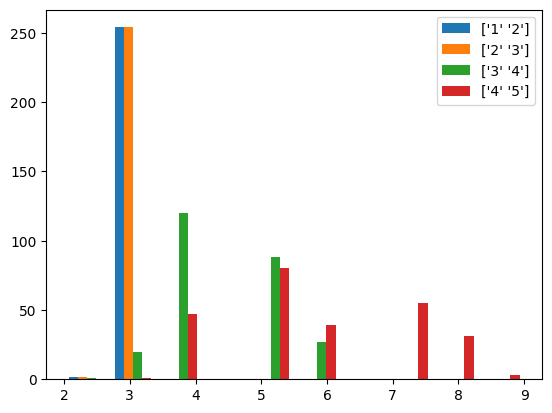

In [ ]:
plt.hist(all_md_list, label=legend_list)
plt.legend()

(1, 2) Counter({3.0: 254, 2.0: 2})
(2, 3) Counter({3.0: 254, 2.0: 2})
(3, 4) Counter({4.0: 120, 5.0: 88, 6.0: 27, 3.0: 20, 2.0: 1})
(4, 5) Counter({5.0: 80, 7.0: 55, 4.0: 47, 6.0: 39, 8.0: 31, 9.0: 3, 3.0: 1})


In [ ]:
xsize = 135
ysize = 256

image_array = tifffile.imread(image_path)

md_list = []
legend_list = []

for i in range(5): #range(len(image_array)):

  diff_md_list = []
  diff_list = []

  f1 = i+1
  f2 = i+2

  if i+1 >= len(image_array):
    break

  else:
    tdframe1 = image_array[i]
    tdframe2 = image_array[i+1]

    for _ in range(256):
      x = random.randrange(2160-xsize)
      y = random.randrange(4096-ysize)

      rect1 = tdframe1[y:y+ysize,x:x+xsize]
      rect2 = tdframe2[y:y+ysize,x:x+xsize]
      range1 = np.reshape(rect1, (xsize*ysize))
      range2 = np.reshape(rect2, (xsize*ysize))

      for n in range(xsize*ysize):
          if range1[n] > range2[n]:
              diff = range1[n] - range2[n]
          elif range1[n] < range2[n]:
              diff = range2[n] - range1[n]
          else:
              diff = 0
          diff_list.append(diff)

      diff_md = np.median(diff_list)
      diff_md_list.append(diff_md)

  legend_list.append((f1,f2))
  md_list.append(diff_md_list)
  # print(diff_md_list,legend_list)


# plt.hist(md_list, 20, label=legend_list)
# plt.legend()


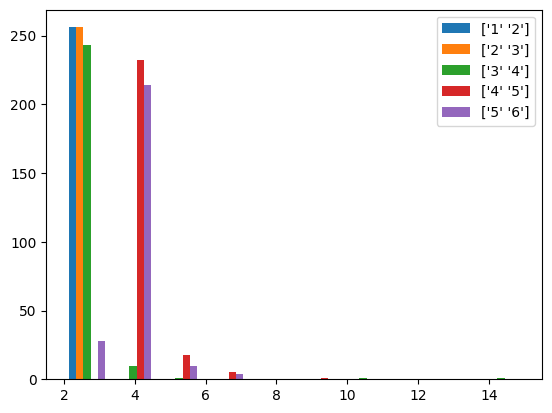

In [ ]:
plt.hist(md_list, label=legend_list, align='mid')
plt.legend()

In [ ]:
import collections

for i in range(5):
    print(legend_list[i], collections.Counter(md_list[i]))

(1, 2) Counter({3.0: 214, 2.0: 42})
(2, 3) Counter({3.0: 255, 4.0: 1})
(3, 4) Counter({3.0: 252, 4.0: 2, 2.0: 1, 5.0: 1})
(4, 5) Counter({4.0: 191, 5.0: 52, 3.0: 10, 2.0: 3})
(5, 6) Counter({4.0: 223, 5.0: 30, 6.0: 2, 2.0: 1})


In [ ]:
image_array = tifffile.imread(image_path)

prv_corr = 0

for i in range(len(image_array)):

  if i+1 >= len(image_array):
    break

  else:
    tdframe1 = image_array[i]
    tdframe2 = image_array[i+1]
    frame1 = np.reshape(tdframe1, (8847360))
    frame2 = np.reshape(tdframe2, (8847360))

    correlation = np.corrcoef(frame1, frame2)
    corr = correlation[0][1]

    if prv_corr == 0:
        pass
    else:
        print(i+1, i+2, abs(prv_corr - corr), prv_corr, corr)
        # if math.isclose(corr, prv_corr, rel_tol=0.01) == False:
        #     print(i+1, i+2)
        #     break
        # else:
        #     print(math.isclose(corr, prv_corr, rel_tol=0.01), prv_corr, corr)

    prv_corr = corr

2 3 2.4651868781755404e-05 0.9498261924184395 0.9498015405496577
3 4 0.013859543402467756 0.9498015405496577 0.93594199714719
4 5 0.04572704822042528 0.93594199714719 0.8902149489267647
5 6 0.01939712427589957 0.8902149489267647 0.9096120732026642
6 7 0.03649583733442208 0.9096120732026642 0.9461079105370863
7 8 0.006737235331841229 0.9461079105370863 0.9528451458689275
8 9 0.015971706230024085 0.9528451458689275 0.9688168520989516
9 10 0.006071953190096457 0.9688168520989516 0.9748888052890481
10 11 0.0006250202215248857 0.9748888052890481 0.9742637850675232
11 12 0.003117251681570732 0.9742637850675232 0.9773810367490939
12 13 0.001358917824560324 0.9773810367490939 0.9787399545736543
13 14 0.0015905720953317548 0.9787399545736543 0.980330526668986
14 15 0.0008590573104831911 0.980330526668986 0.9811895839794692
15 16 0.003343655308698512 0.9811895839794692 0.9778459286707707
16 17 0.0003435291197469992 0.9778459286707707 0.9775023995510237
17 18 0.0013128291707279471 0.9775023995510